<a href="https://colab.research.google.com/github/RakeshBB08/Deep_learning/blob/master/TF_on_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [21]:
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
y_train,y_test = y_train.flatten(),y_test.flatten() # converting output nX1 format as per tf convention
print(x_train,y_train)
print(x_train.shape)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [22]:
x_train,x_test = x_train/255.0, x_test/255.0

In [23]:
# the data is only 2D
# Convolutio  expects height x width x color
print(x_train.shape)

(50000, 32, 32, 3)


In [24]:
K = len(set(y_train))
print(K)

10


In [25]:
# Building the model using the functional API
i = Input(shape = x_train[0].shape)
x = Conv2D(32,(3,3),strides =2,activation = 'relu')(i)
x = Conv2D(64,(3,3),strides =2,activation = 'relu')(x)
x = Conv2D(128,(3,3),strides = 2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K,activation = 'softmax')(x)

model = Model(i,x)

In [26]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
r = model.fit(x_train,y_train, validation_data = (x_test,y_test),epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 48s 29ms/step - loss: 1.5427 - accuracy: 0.4395 - val_loss: 1.2545 - val_accuracy: 0.5506
Epoch 2/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.2041 - accuracy: 0.5716 - val_loss: 1.0863 - val_accuracy: 0.6092
Epoch 3/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.0556 - accuracy: 0.6242 - val_loss: 1.0196 - val_accuracy: 0.6326
Epoch 4/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9482 - accuracy: 0.6634 - val_loss: 1.0003 - val_accuracy: 0.6423
Epoch 5/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8641 - accuracy: 0.6935 - val_loss: 0.9434 - val_accuracy: 0.6685
Epoch 6/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7887 - accuracy: 0.7206 - val_loss: 0.9039 - val_accuracy: 0.6807
Epoch 7/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.7227 - accuracy: 0.7436 - val_loss: 0.9078 -

In [27]:
labels = 'airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck'.split(',')

313/313 [==============================] - 2s 7ms/step
Confusion matrix, without normalisation
[[768  15  45   8  28   9  12  14  70  31]
 [ 20 762  11   4   3   4  26   3  38 129]
 [ 52   5 579  46  87  66 112  30  15   8]
 [ 24   7  92 411  68 182 134  37  23  22]
 [ 23   4  75  30 629  36 118  68  11   6]
 [ 17   1  58 141  48 584  78  55  11   7]
 [  4   3  36  25  20  18 872   4  11   7]
 [ 22   3  41  26  56  52  22 762   3  13]
 [ 55  34  14   9   9   5  10   2 844  18]
 [ 43  69  11  11   8  11  12  12  47 776]]


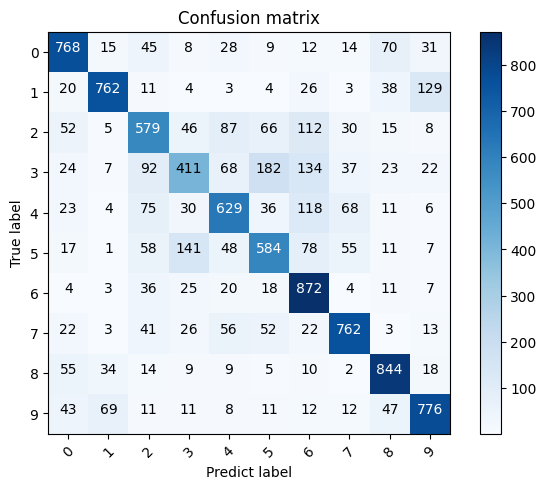

In [30]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm,classes,normalize =False,title = 'Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float')/cm.sum(axis =1)[:,np.newaxis]
    print('Normalise confusion matrix')
  else:
    print('Confusion matrix, without normalisation')
  print(cm)

  plt.imshow(cm,interpolation ='nearest',cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation = 45)
  plt.yticks(tick_marks,classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() /2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j],fmt),horizontalalignment = 'center',
            color = 'white' if cm[i,j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predict label')
  plt.show()

p_test= model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

Text(0.5, 1.0, 'True label: automobile, Predicted:truck:')

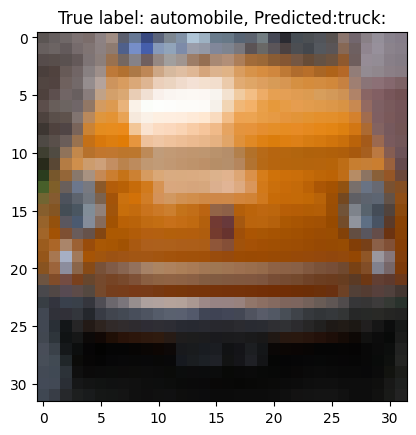

In [35]:
missclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(missclassified_idx)
plt.imshow(x_test[i],cmap = 'gray')
plt.title(f"True label: {labels[y_test[i]]}, Predicted:{labels[p_test[i]]}:")